### BTC-USD correlation to US stocks, bonds, minerals

In [1]:
import numpy as np
import pandas as pd
import yfinance as yf

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import time

In [27]:
# get historical daily price change.
hist_list = []
for symbol in ['GLD','SLV','TIPS','LQD','IWM','SPY','QQQ','SQ','TSLA','BTC-USD']:
    tick = yf.Ticker(symbol)
    df = tick.history(period="max")
    df = df[['Close']]
    df.Close = df.Close.pct_change(1)
    df = df.dropna()
    df=df.rename(columns={'Close':symbol})
    hist_list.append(df)
df = hist_list[-1]
rest = hist_list[:-1]

In [28]:
for x in rest:
    df = pd.merge(df,x,how='left',left_index=True,right_index=True)

In [29]:
df=df.dropna()

In [30]:
df.shape,np.min(df.index),np.max(df.index)

((1263, 10),
 Timestamp('2015-11-20 00:00:00'),
 Timestamp('2020-11-27 00:00:00'))

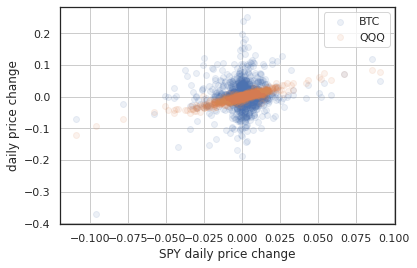

In [31]:
plt.scatter(df['SPY'],df['BTC-USD'],alpha=0.1,label='BTC')
plt.scatter(df['SPY'],df['QQQ'],alpha=0.1,label='QQQ')
plt.xlabel('SPY daily price change')
plt.ylabel('daily price change')
plt.grid(True)
plt.legend()

Correlation coefficient of daily price return between 10 assets (n=1263)
date range from 2015-11-20 to 2020-11-27


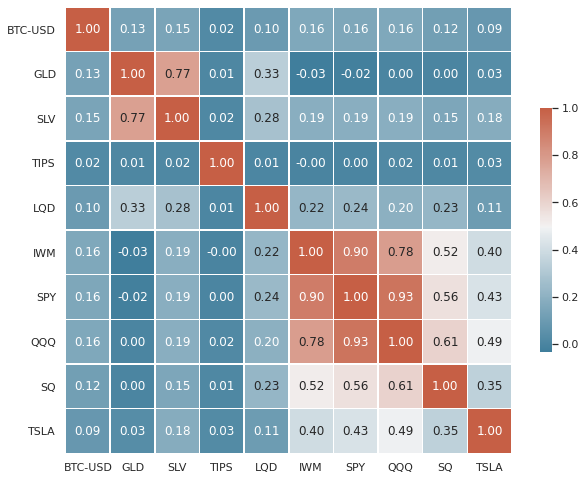

In [40]:
sns.set_theme(style="white")

corr = df.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(10,9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, cmap=cmap, vmax=1., center=0.5, #mask=mask,
            square=True, linewidths=.5, cbar_kws={"shrink": .5},
            annot=True, fmt="1.2f")

plt.yticks(rotation=0)
print(f'Correlation coefficient of daily price return between 10 assets (n={df.shape[0]})')
print(f'date range from {df.index[0].date()} to {df.index[-1].date()}')

In [35]:
df.corr()

,BTC-USD,GLD,SLV,TIPS,LQD,IWM,SPY,QQQ,SQ,TSLA
BTC-USD,1.000000,0.131107,0.145053,0.024152,0.097408,0.161998,0.158779,0.161061,0.118855,0.085974
GLD,0.131107,1.000000,0.773675,0.009688,0.333449,-0.034783,-0.021511,0.003460,0.004081,0.034559
SLV,0.145053,0.773675,1.000000,0.016376,0.279997,0.188455,0.189321,0.188236,0.151587,0.182098
TIPS,0.024152,0.009688,0.016376,1.000000,0.008996,-0.002016,0.003652,0.018444,0.013880,0.028081
LQD,0.097408,0.333449,0.279997,0.008996,1.000000,0.224049,0.237210,0.196056,0.227062,0.110159
IWM,0.161998,-0.034783,0.188455,-0.002016,0.224049,1.000000,0.897429,0.782335,0.517778,0.400319
SPY,0.158779,-0.021511,0.189321,0.003652,0.237210,0.897429,1.000000,0.925998,0.559837,0.427185
QQQ,0.161061,0.003460,0.188236,0.018444,0.196056,0.782335,0.925998,1.000000,0.606921,0.490857
SQ,0.118855,0.004081,0.151587,0.013880,0.227062,0.517778,0.559837,0.606921,1.000000,0.347316
TSLA,0.085974,0.034559,0.182098,0.028081,0.110159,0.400319,0.427185,0.490857,0.347316,1.000000
